In [1]:
import pandas as pd
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filtered_dataset = pd.read_csv('/content/drive/MyDrive/PYTHON/Latent Dirichlet Alg/dataset_informatica.csv')
filtered_dataset = filtered_dataset.drop(columns = 'keywords')

In [4]:
#pulizia del campo descrizione
import re

filtered_dataset['text_preprocessed']=filtered_dataset['description'].map(lambda x: re.sub('[,.\!?]', '', x)) #pulire
filtered_dataset['text_preprocessed']=filtered_dataset['text_preprocessed'].map(lambda x: x.lower()) #lowercase
filtered_dataset['text_preprocessed']

0       in this introductory lesson coders create a si...
1       coders storyboard a project based on randomize...
2       coders use a variety of blocks and customized ...
3       coders use a variety of blocks and sprites to ...
4       coders use a variety of blocks and sprites to ...
                              ...                        
1345    this video was recorded at 5th international c...
1346    this video was recorded at 13th acm sigkdd int...
1347    this video was recorded at machine learning su...
1348    this video was recorded at video journal of ma...
1349    this video was recorded at 6th international a...
Name: text_preprocessed, Length: 1350, dtype: object

In [5]:
long_string =','.join(list(filtered_dataset['text_preprocessed'].values))

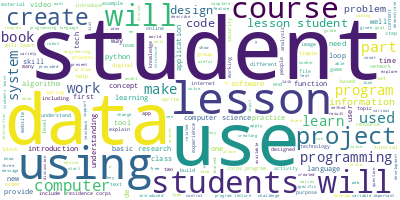

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['student','course','use','will', 'students', 'data', 'lesson', 'lessons', 'learn', 'using', 'used'])

def sent_to_words(sentence):
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) #converting the raw text into a list of tokens (words) deacc removes accents
    
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = filtered_dataset['text_preprocessed'][3]
words = list(sent_to_words(data))

words = remove_stopwords(words)
print(words)

[['coders', 'variety', 'blocks', 'sprites', 'create', 'interactive', 'diorama', 'predictions', 'future', 'purpose', 'project', 'apply', 'previously', 'learned', 'concepts', 'new', 'context', 'eg', 'modifying', 'sprites', 'parallelism', 'events', 'etc']]


In [8]:
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel

def lda(words):
    
    id2word = corpora.Dictionary(words)
    texts = words
    corpus = [id2word.doc2bow(text) for text in texts]
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    

    return lda_model.print_topics()
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    

In [9]:
def coherence(words):
    
    id2word = corpora.Dictionary(words)
    texts = words
    corpus = [id2word.doc2bow(text) for text in texts]
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=words,
                                         dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

In [10]:
coherence(words)

0.9999999999999998

**ESTENSIONE A TUTTO IL DATASET**

In [11]:
import re
import tqdm

dataset = pd.read_csv('/content/drive/MyDrive/PYTHON/Latent Dirichlet Alg/dataset_informatica_full.csv')
dataset = dataset.drop(columns = 'keywords')
dataset = dataset[dataset['WikiDescription']!="0"]
dataset = dataset[dataset['WikiDescription']!="-"]
dataset = dataset[dataset['WikiDescription']!='']

dataset['text_preprocessed']=dataset['WikiDescription'].map(lambda x: re.sub('[,.\!?]', '', x))
dataset['text_preprocessed']=dataset['text_preprocessed'].map(lambda x: x.lower())
stop_words = stopwords.words('italian')
dataset['topic'] = 0

dataset[:3]

,Unnamed: 0.1,Unnamed: 0,link,disciplines,title,description,type,Upload_Date,authors,language,...,format,duration,public,min_age,max_age,resource_image,WikiLink,WikiDescription,text_preprocessed,topic
0,809,809,https://www.oercommons.org/courses/intro-to-sc...,Applied Science/Computer Science,Intro to Scratch,"In this lesson, students will begin exploring ...",['Activity/Lab'],2021-03-30 00:00:00,NYC Computer Science for All,English,...,['Audio' 'Text/HTML' 'Video'],60-90,['Upper Primary'],6.0,11.0,https://oercommons.s3.amazonaws.com/media/thum...,https://it.wikipedia.org/wiki/Scratch_(informa...,Scratch è un ambiente di programmazione gratui...,scratch è un ambiente di programmazione gratui...,0
1,810,810,https://www.oercommons.org/courses/intro-to-sc...,Applied Science/Computer Science,Intro to Scratch,Students encounter the Scratch programming pla...,['Activity/Lab'],2021-04-06 00:00:00,NYC Computer Science for All,English,...,['Downloadable docs' 'Text/HTML' 'Video'],60-90,"['Lower Primary', 'Upper Primary']",6.0,11.0,https://oercommons.s3.amazonaws.com/media/thum...,https://it.wikipedia.org/wiki/Scratch_(informa...,"Scratch è adatto a studenti, insegnanti e geni...",scratch è adatto a studenti insegnanti e genit...,0
2,811,811,https://www.oercommons.org/courses/intro-to-ve...,Applied Science/Computer Science,Intro to Vectors Physics and Augmented Reality,Students learn about video motion capture tech...,['Lesson'],2018-08-30 00:00:00,Jackson Reimers,English,...,['Text/HTML'],0-30,['High School'],14.0,18.0,https://oercommons.s3.amazonaws.com/media/thum...,https://it.wikipedia.org/wiki/Realt%C3%A0_aume...,"Per realtà aumentata, o realtà mediata dall'el...",per realtà aumentata o realtà mediata dall'ela...,0


In [12]:
coherences = []
topics = []

In [ ]:
#GENERATE TOPICS FOR EACH ROW OF DF

pbar = tqdm.tqdm(total=int(dataset.shape[0]))

def paral_lda(dataset):
    for index, row in dataset.iterrows():
        data = row['text_preprocessed']
        if (data != '' or data != '-') :
            words = list(sent_to_words(data))
            words = remove_stopwords(words)
            topic = lda(words)
            topics.append(topic)
            co_val = coherence(words)
            coherences.append(co_val)
            print(f"{index}/{dataset.shape[0]}")
            pbar.update(1)
    return dataset

#PARALLELIZATION
#dataset = dataset.reset_index()
#import multiprocessing
##num_processes = multiprocessing.cpu_count()
#chunk_size = int(dataset.shape[0]/num_processes)
#chunks = [dataset.iloc[dataset.index[i:i + chunk_size]] for i in range(0, dataset.shape[0], chunk_size)]

#pool = multiprocessing.Pool(processes = num_processes)
#result = pool.map(paral_lda, chunks)
dataset = paral_lda(dataset)
dataset.shape, len(topics)

In [ ]:
dataset['topics'] = topics
dataset['topics']

0       [(0, 0.143*"gratuito" + 0.143*"linguaggio" + 0...
1       [(0, 0.044*"pedagogici" + 0.044*"progetti" + 0...
2       [(0, 0.103*"realta" + 0.056*"percezione" + 0.0...
3       [(0, 0.077*"tipi" + 0.077*"calcoli" + 0.077*"c...
4       [(0, 0.125*"essi" + 0.125*"correlati" + 0.125*...
                              ...                        
1078    [(0, 0.190*"dati" + 0.190*"gestione" + 0.103*"...
1079    [(0, 0.045*"dati" + 0.045*"scientifica" + 0.04...
1080    [(0, 0.016*"dati" + 0.015*"modelli" + 0.013*"m...
1081    [(0, 0.063*"informazione" + 0.063*"codificata"...
1082    [(0, 0.012*"dati" + 0.011*"strumenti" + 0.011*...
Name: topics, Length: 1066, dtype: object

In [ ]:
dataset['coherence'] = coherences
dataset['coherence']

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1078    1.000000
1079    1.000000
1080    0.316243
1081    1.000000
1082    0.759783
Name: coherence, Length: 1066, dtype: float64

In [ ]:
dataset.coherence.mean(), dataset.coherence.std()

(0.9598009897518387, 0.14783327915397762)

In [ ]:
dataset = dataset.reset_index()
for index, row in dataset.iterrows():
    #print(index)
    topicstringtemp = ''
    for i in range(5):
        topicstring = re.sub('[1234567890.*" ]', '', topics[index][i][1])
        topicstringtemp = topicstringtemp + topicstring
    dataset.at[index, 'topics'] = topicstringtemp

In [ ]:
dataset['topics']

0       gratuito+linguaggio+scratch+grafico+tipo+ambie...
1       pedagogici+progetti+studenti+insegnanti+genito...
2       realta+percezione+sensoriale+convogliate+elabo...
3       tipi+calcoli+complessi+eseguire+grado+macchina...
4       essi+correlati+riferimenti+gestione+software+z...
                              ...                        
1061    dati+gestione+discipline+relative+tutte+risors...
1062    dati+scientifica+visualizzazione+scelta+geogra...
1063    dati+modelli+modello+processo+modellazione+rif...
1064    informazione+codificata+dato+latino+entita+tra...
1065    dati+strumenti+struttura+strutture+insieme+piu...
Name: topics, Length: 1066, dtype: object

In [ ]:
#topics

In [ ]:
topiclist =[]
for response in topics:
    for i in range(5):
        generic = re.sub('[1234567890.*" ]', '', response[i][1])
        singletopic_list  = re.split('[+]', generic)
        for item in singletopic_list:
            topiclist.append(item)

In [ ]:
#topiclist

In [ ]:
topicSeries = pd.Series(topiclist)
concepts = topicSeries.unique()
len(concepts)

3859

In [ ]:
concepts = concepts.tolist()
concepts

['gratuito',
 'linguaggio',
 'scratch',
 'grafico',
 'tipo',
 'ambiente',
 'programmazione',
 'pedagogici',
 'progetti',
 'studenti',
 'insegnanti',
 'genitori',
 'arte',
 'interattiva',
 'simulazioni',
 'spaziano',
 'consentendo',
 'semplici',
 'visualizzazione',
 'adatto',
 'esperimenti',
 'animazioni',
 'utilizzabile',
 'giochi',
 'scienza',
 'matematica',
 'musica',
 'intrattenimento',
 'realizzazione',
 'realta',
 'percezione',
 'sensoriale',
 'convogliate',
 'elaboratore',
 'cinque',
 'manipolate',
 'genere',
 'aumentata',
 'mediata',
 'arricchimento',
 'intende',
 'sensi',
 'percepibili',
 'informazioni',
 'umana',
 'mediante',
 'tipi',
 'calcoli',
 'complessi',
 'eseguire',
 'grado',
 'macchina',
 'altri',
 'dati',
 'computer',
 'elaborazioni',
 'programmabile',
 'automatizzata',
 'matematici',
 'essi',
 'correlati',
 'riferimenti',
 'gestione',
 'software',
 'zotero',
 'materiali',
 'bibliografici',
 'rete',
 'topologia',
 'relazioni',
 'costituenti',
 'geometrico',
 'elementi